### PREDICTING FURNITURE SALES FROM ALIEXPRESS DATA

#### Import libraries

In [1]:
# Basic libraries
import pandas as pd
import numpy as np

In [2]:
# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# ML tools
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [4]:
# Display settings
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

#### Load & Inspecting the data

In [24]:
df=pd.read_excel('complete_ecommerce_furniture_dataset_2024.xlsx', sheet_name='Data_Sheet4');
df.head()

,product_title,price,sold,tag_text,original_price
0,Desser For Bedroom With 7 Fabric Drawers Organ...,39.46,7,0.0,78.40
1,Small Unit Simple Computer Desk Household Wood...,21.37,1,0.0,48.82
2,"3 Pieces Patio Furniture Set, Outdoor Swivel G...",123.40,53,0.0,1294.04
3,"Living Room Furniture, Modern 3-Piece Includin...",734.58,5,0.0,1474.17
4,7-piece patio furniture set modular wicker out...,331.24,39,0.0,671.47


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_title   2000 non-null   object 
 1   price           2000 non-null   float64
 2   sold            2000 non-null   int64  
 3   tag_text        1997 non-null   float64
 4   original_price  2000 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 78.3+ KB


In [26]:
df.isna().sum()

product_title     0
price             0
sold              0
tag_text          3
original_price    0
dtype: int64

#### Exploratory Data Analysis (EDA)

##### Distribution of prices

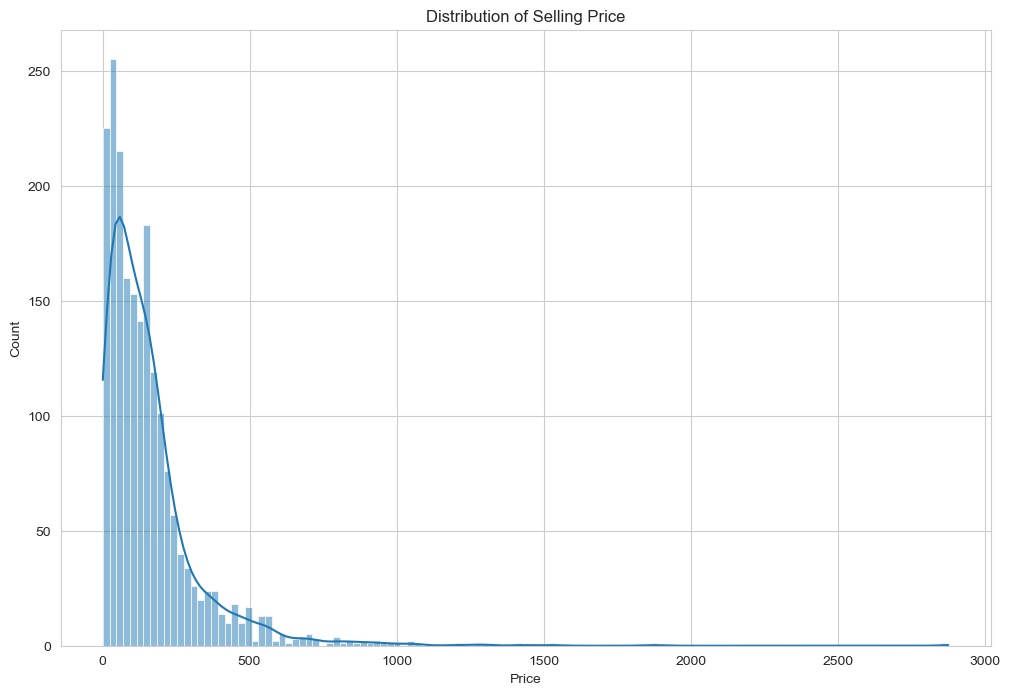

In [27]:
plt.figure(figsize=(12,8))
sns.histplot(df['price'], kde=True)
plt.title("Distribution of Selling Price")
plt.xlabel('Price')
plt.show()

##### Distribution of Solded Items

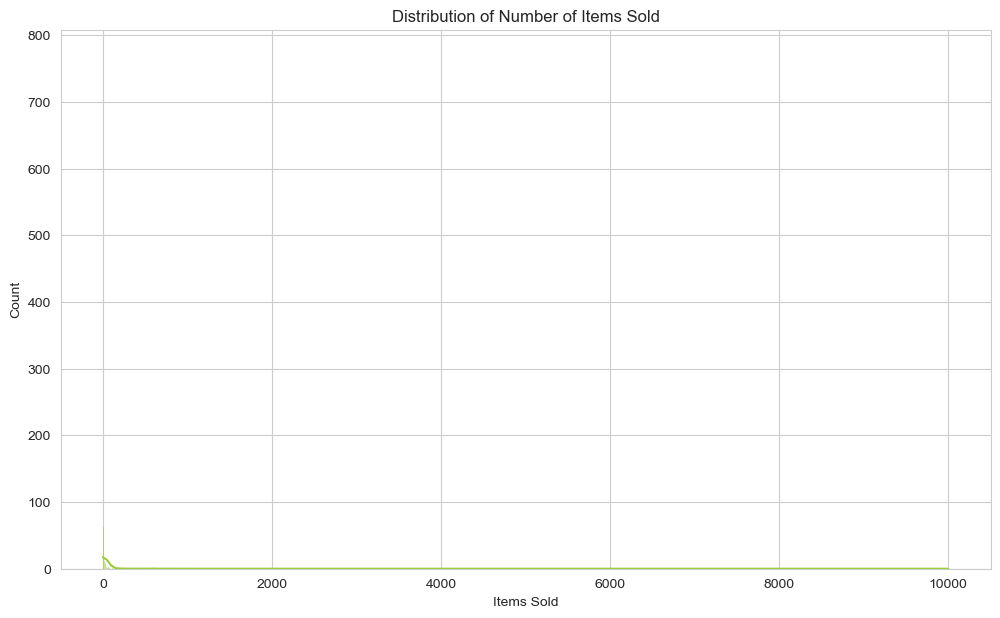

In [28]:
plt.figure(figsize=(12,7))
sns.histplot(df['sold'], kde=True, color='yellowgreen')
plt.title("Distribution of Number of Items Sold")
plt.xlabel('Items Sold')
plt.show()

##### Relation b/w Price and Sold

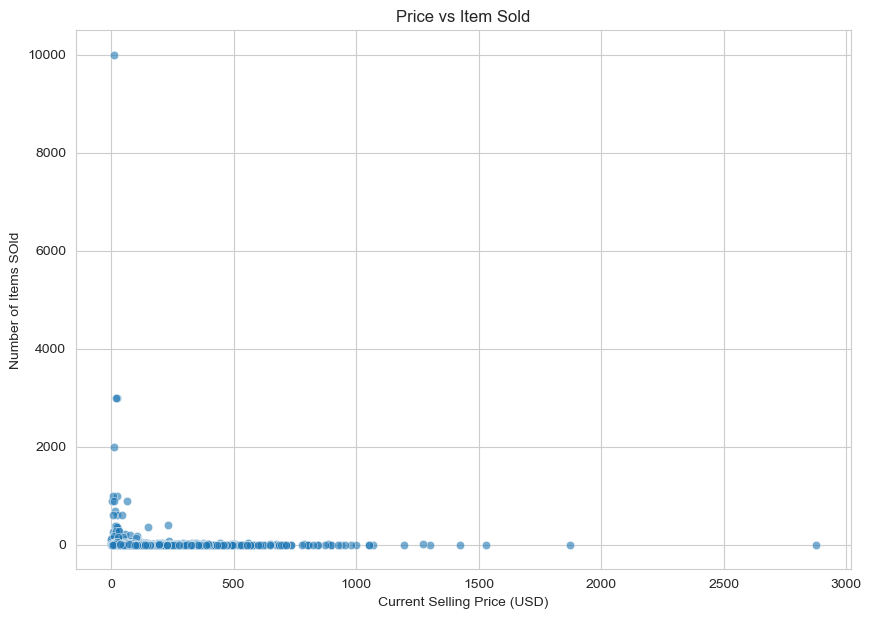

In [29]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='price', y='sold', data=df, alpha=0.6)
plt.title("Price vs Item Sold")
plt.xlabel("Current Selling Price (USD)")
plt.ylabel("Number of Items SOld")
plt.show()

##### Discount Effect (Original Price vs Current Price)

In [30]:
df['discount']=(df['original_price']-df['price'])/df['original_price']*100
df['discount']

0       49.668367
1       56.226956
2       90.463973
3       50.169926
4       50.669427
          ...    
1995    55.039941
1996    50.901813
1997    51.546503
1998    51.241276
1999    53.606526
Name: discount, Length: 2000, dtype: float64

In [31]:
df[['original_price', 'price']].head()
df[['original_price', 'price']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   original_price  2000 non-null   float64
 1   price           2000 non-null   float64
dtypes: float64(2)
memory usage: 31.4 KB


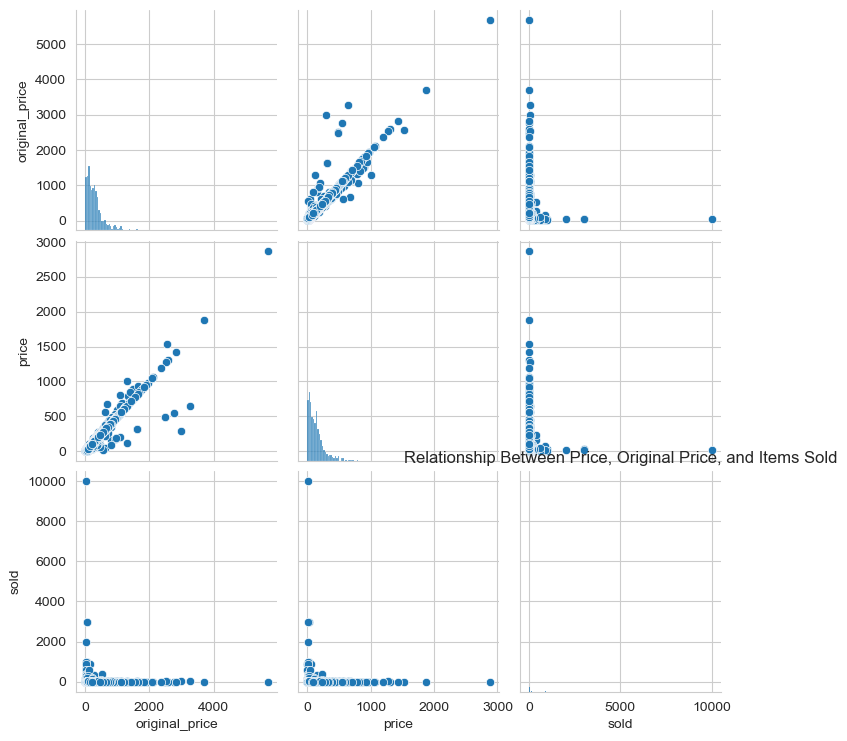

In [32]:
# Plot the relationship between originalPrice, price and sold
sns.pairplot(df, vars=['original_price', 'price', 'sold'],
kind='scatter')
plt.title("Relationship Between Price, Original Price, and Items Sold")
plt.show()

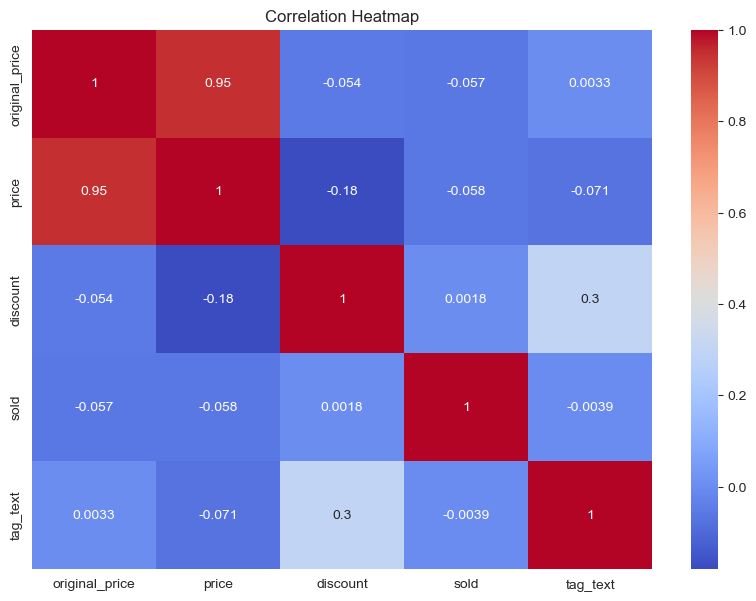

In [33]:
#Correlation heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df[['original_price', 'price', 'discount', 'sold', 'tag_text']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [15]:
def clean_tag_text(x):
    try:
        return float(x)
    except ValueError:
        return x

df['tag_text'] = df['tag_text'].apply(clean_tag_text)

In [34]:
def classify_shipping(tag):
    if tag == 0.00:
        return 'Free Shipping'
    elif tag == 'NA':
        return 'Others'
    else:
        return 'Shipping Cost'

df['shipping_type'] = df['tag_text'].apply(classify_shipping)

In [35]:
shipping_counts = df['shipping_type'].value_counts()

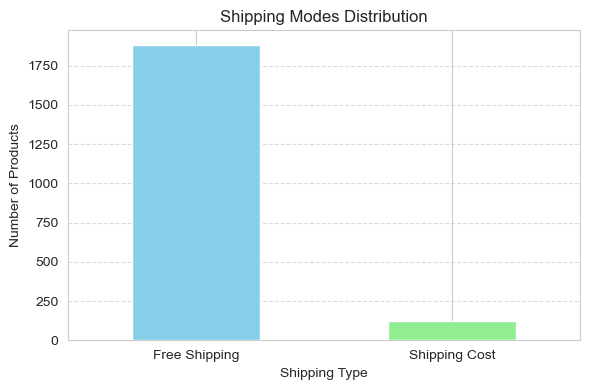

In [36]:
plt.figure(figsize=(6,4))
shipping_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'orange'])
plt.title('Shipping Modes Distribution')
plt.xlabel('Shipping Type')
plt.ylabel('Number of Products')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Feature Engineering

In [37]:
df['price_diff']=df['original_price']-df['price']
df['log_price']=np.log1p(df['price'])
df['log_original_price']=np.log1p(df['original_price'])
df['sold']=np.log1p(df['sold'])

In [38]:
x=df[['price', 'original_price', 'discount', 'tag_text']]
y=df['sold']

In [39]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
print(f"Train shape: {x_train.shape}, Test shape: {x_test.shape}")

Train shape: (1600, 4), Test shape: (400, 4)


In [42]:
model=RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(x_train, y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [43]:
y_pred=model.predict(x_test)
pd.Series(y_pred).head()

0    2.150256
1    3.522372
2    2.696024
3    2.260270
4    0.869246
dtype: float64

In [44]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) 
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 0.9031404130580742
RMSE: 1.1558134163117055
R²: 0.2217686157740364


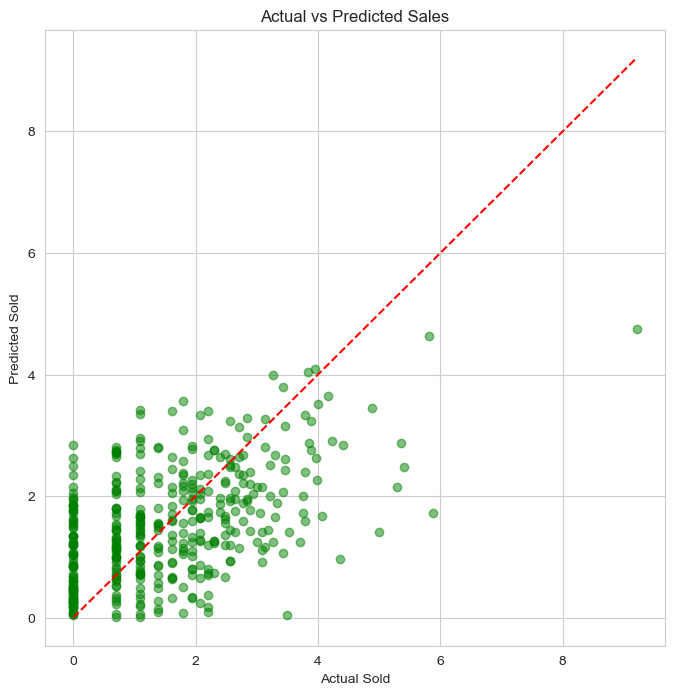

In [45]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred, alpha=0.5, color='green')
plt.plot([0, y_test.max()], [0, y_test.max()], 'r--')
plt.title("Actual vs Predicted Sales")
plt.xlabel("Actual Sold")
plt.ylabel("Predicted Sold")
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_21652\695521260.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.values, y=importances.index, palette='viridis')


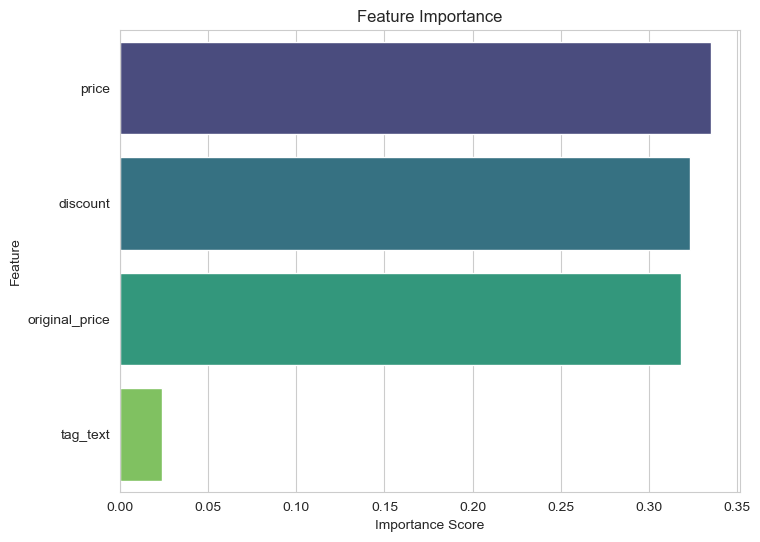

In [46]:
# Feature Importrance
importances=pd.Series(model.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=importances.values, y=importances.index, palette='viridis')
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

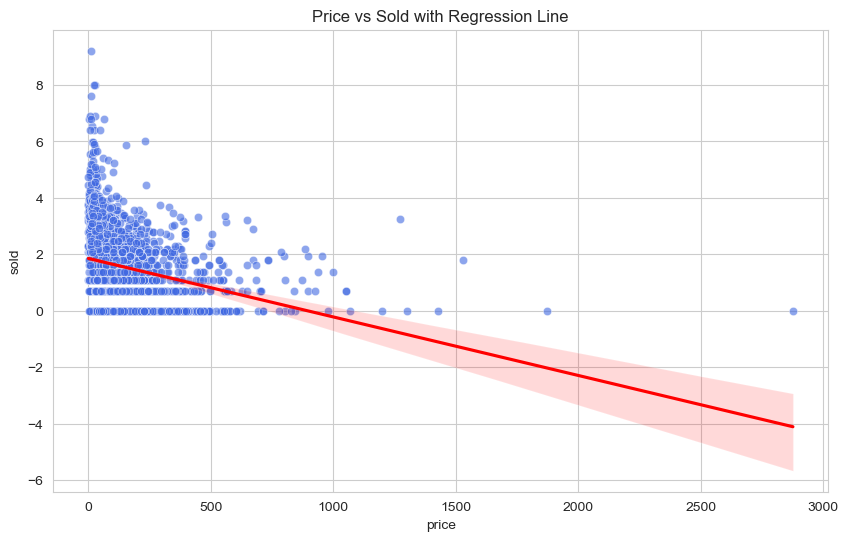

In [50]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='price', y='sold', color='royalblue', alpha=0.6)
sns.regplot(data=df, x='price', y='sold', scatter=False, color='red')
plt.title("Price vs Sold with Regression Line")
plt.show()